In [13]:
#Pandas library is used for data analysis and manipulation. It helps work with structured data.
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [14]:
#NumPy library is used for scientific computing. It supports large multidimentionalarrays and matrices. 
pip install numpy


Note: you may need to restart the kernel to use updated packages.


In [15]:
#SciPy library works alongside Numpy and performs statistical functions. 
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [16]:
#xlrd is used for reading data from Excel files.
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [17]:
#Used for estimating and interpreting various statistical models, including regression analysis and hypothesis testing
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [18]:
#Displaying data from biomarkers and Covariates files.
import pandas as pd
from scipy.stats import ttest_ind
import statsmodels.api as sm
import statsmodels.formula.api as ols

# Load the biomarkers data
biomarkers_df = pd.read_excel('biomarkers.xlsx')
print(biomarkers_df)

#Load the Covariates Data
covariates_df = pd.read_excel('covariates.xlsx')
print(covariates_df)

        Biomarker  IL-8  VEGF-A    OPG  TGF-beta-1  IL-6  CXCL9  CXCL1  IL-18  \
0      126-0weeks  7.63   11.51  10.20        8.83  3.52   6.16   9.45   7.91   
1      126-6weeks  7.12   11.59  10.41        8.87  3.89   6.12   9.06   7.92   
2      127-0weeks  6.93   10.92  10.30        6.59  2.73   6.14   7.31   7.95   
3      127-6weeks  7.16   11.58  10.39        8.61  2.60   6.35   8.61   7.94   
4    127-12months  6.87   11.13  10.25        7.44  3.92   6.15   8.79   7.94   
..            ...   ...     ...    ...         ...   ...    ...    ...    ...   
342    121-6weeks  7.21   12.89  10.69        8.90  3.14   5.97   8.00   8.17   
343  121-12months  6.35   11.01   9.96        6.70  2.55   4.68   7.34   7.76   
344    122-0weeks  7.86   12.80  10.73        9.30  2.93   6.73   9.60   8.25   
345    122-6weeks  8.52   13.04  10.81        8.79  2.94   6.73   9.64   8.19   
346    124-0weeks  6.51   11.38  10.07        7.78  3.29   5.97   7.17   8.68   

     CSF-1  
0     8.41  
1

In [19]:
#Statistical Modelling : We use t-test to find out the difference between males and females for each biomarker.
import pandas as pd
from scipy import stats

# Load the data from covariates.xlsx and biomarkers.xlsx
covariates_data = pd.read_excel('covariates.xlsx')
biomarkers_data = pd.read_excel('biomarkers.xlsx')

# Merge the data frames using pd.concat
merged_data = pd.concat([biomarkers_data, covariates_data], axis=1)

# Defining the biomarkers we want to test
biomarker_names = ['IL-8', 'VEGF-A', 'OPG', 'TGF-beta-1', 'IL-6', 'CXCL9', 'CXCL1', 'IL-18', 'CSF-1']

# Perform t-test for each biomarker to test if levels differ between males and females
results = {}
for biomarker in biomarker_names:
    male_values = merged_data[merged_data['Sex (1=male, 2=female)'] == 1][biomarker]
    female_values = merged_data[merged_data['Sex (1=male, 2=female)'] == 2][biomarker]
    t_stat, p_value = stats.ttest_ind(male_values, female_values)
    results[biomarker] = {
        't-statistic': t_stat,
        'p-value': p_value
    }

# Display the results
for biomarker, result in results.items():
    print(f"Results for {biomarker}:")
    print(f"  t-statistic: {result['t-statistic']}")
    print(f"  p-value: {result['p-value']}")


Results for IL-8:
  t-statistic: -1.859993825255894
  p-value: 0.06541954417603674
Results for VEGF-A:
  t-statistic: -1.1128682325487507
  p-value: 0.26806589978951945
Results for OPG:
  t-statistic: -0.9593294997104114
  p-value: 0.3393880721603626
Results for TGF-beta-1:
  t-statistic: -0.19354594439339007
  p-value: 0.8468699267439841
Results for IL-6:
  t-statistic: -1.9552114359229198
  p-value: 0.05296328851072834
Results for CXCL9:
  t-statistic: -1.3783156197408333
  p-value: 0.17075849575438093
Results for CXCL1:
  t-statistic: -0.7344907676770522
  p-value: 0.4641318482208482
Results for IL-18:
  t-statistic: -0.5013007580956118
  p-value: 0.6171094832359435
Results for CSF-1:
  t-statistic: -1.522903701759829
  p-value: 0.13050432949918808


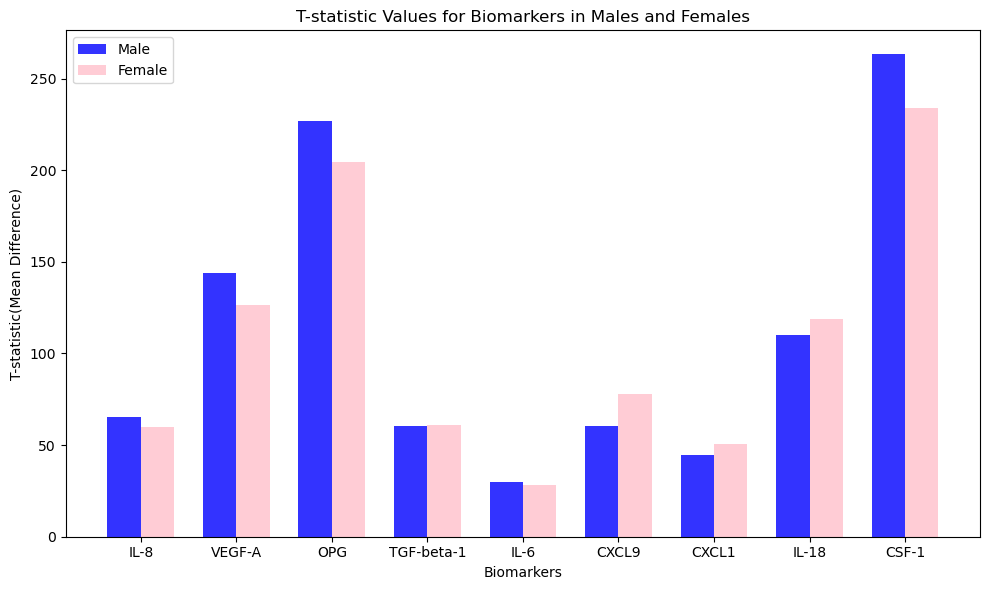

In [15]:
#Plot to show difference between males and females for each biomarker 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data from covariates.xlsx and Biomarkers.xlsx
covariates_data = pd.read_excel('covariates.xlsx')
biomarkers_data = pd.read_excel('biomarkers.xlsx')

# Merge the data frames using pd.concat function
merged_data = pd.concat([biomarkers_data, covariates_data], axis=1)

# Defining the biomarkers we want to test
biomarker_names = ['IL-8', 'VEGF-A', 'OPG', 'TGF-beta-1', 'IL-6', 'CXCL9', 'CXCL1', 'IL-18', 'CSF-1']

# Initialize lists to store T-statistic values for males and females
male_t_values = []
female_t_values = []

# Perform t-test for each biomarker to test if levels differ between males and females
for biomarker in biomarker_names:
    male_values = merged_data[merged_data['Sex (1=male, 2=female)'] == 1][biomarker]
    female_values = merged_data[merged_data['Sex (1=male, 2=female)'] == 2][biomarker]
    
    t_stat_male, _ = stats.ttest_1samp(male_values, 0)
    t_stat_female, _ = stats.ttest_1samp(female_values, 0)
    
    male_t_values.append(t_stat_male)
    female_t_values.append(t_stat_female)

# Create an array of indexes to match the number of biomarkers
index = np.arange(len(biomarker_names))
bar_width = 0.35
opacity = 0.8

# Create a bar graph
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the T-statistic values for males and females for each biomarker
plt.bar(index, male_t_values, bar_width, alpha=opacity, color='blue', label='Male')
plt.bar(index + bar_width, female_t_values, bar_width, alpha=opacity, color='pink', label='Female')

# Label the axes
plt.xlabel('Biomarkers')
plt.ylabel('T-statistic(Mean Difference)')
plt.title('T-statistic Values for Biomarkers in Males and Females')
plt.xticks(index + bar_width/2, biomarker_names)
plt.legend()

# Show the graph
plt.tight_layout()
plt.show()


In [16]:
#

In [61]:
#

In [17]:
#To Calculate the probability of making atleast one Type I error.
def probability_of_type_i_error(alpha, num_tests):
    
    probability = 1 - (1 - alpha) ** num_tests
    return probability

# Set the significance level for a single test and the number of tests
alpha = 0.05
num_tests = 9  # Number of biomarkers

# Calculate the probability of making at least one Type I error
probability_type_i_error = probability_of_type_i_error(alpha, num_tests)

# Print the result
print(f"Probability of making at least one Type I error: {probability_type_i_error:.4f}")


Probability of making at least one Type I error: 0.3698


In [18]:
#Bonferroni Correction 
import pandas as pd
from scipy import stats

# Load the data from covariates.xlsx and Biomarkers.xlsx
covariates_data = pd.read_excel('covariates.xlsx')
biomarkers_data = pd.read_excel('biomarkers.xlsx')

# Merge the data frames using pd.concat
merged_data = pd.concat([biomarkers_data, covariates_data], axis=1)

# Define the biomarkers we want to test
biomarker_names = ['IL-8', 'VEGF-A', 'OPG', 'TGF-beta-1', 'IL-6', 'CXCL9', 'CXCL1', 'IL-18', 'CSF-1']

# Dictionary to store results
results = {}

# Significance level (before Bonferroni correction)
alpha = 0.05

# Number of tests (number of biomarkers)
num_tests = len(biomarker_names)

# Bonferroni-corrected significance level
bonferroni_alpha = alpha / num_tests

# Perform t-test for each biomarker to test if levels differ between males and females
for biomarker in biomarker_names:
    male_values = merged_data[merged_data['Sex (1=male, 2=female)'] == 1][biomarker]
    female_values = merged_data[merged_data['Sex (1=male, 2=female)'] == 2][biomarker]
    t_stat, p_value = stats.ttest_ind(male_values, female_values)
    
    # Check significance with Bonferroni correction
    if p_value < bonferroni_alpha:
        results[biomarker] = {
            't-statistic': t_stat,
            'p-value (Bonferroni corrected)': p_value
        }

# Display the results if no significant results were found
if len(results) > 0:
    for biomarker, result in results.items():
        print(f"Results for {biomarker}:")
        print(f"  t-statistic: {result['t-statistic']}")
        print(f"  p-value (Bonferroni corrected): {result['p-value (Bonferroni corrected)']}")
else:
    print("No statistically significant results found after Bonferroni correction.")


No statistically significant results found after Bonferroni correction.


In [1]:
#

In [2]:
#

In [3]:
#

In [4]:
#

In [19]:
#TASK 2 : REGRESSION MODELLING 
#Model used : Linear Regression model
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load the data from covariates.xlsx and biomarkers.xlsx
covariates_data = pd.read_excel('covariates.xlsx')
biomarkers_data = pd.read_excel('biomarkers.xlsx')

# Merge the data frames using pd.concat function.
merged_data = pd.concat([biomarkers_data, covariates_data], axis=1)

# Select 80% of the patients for training.
train_data = merged_data.sample(frac=0.8, random_state=1)

# Handle missing values (remove rows with missing values)
train_data = train_data.dropna()

# Check for and handle infinite values
train_data = train_data.replace([np.inf, -np.inf], np.nan).dropna()

# Define the response variable(Y) and explanatory variables(in array X)
y = train_data['Vas-12months']
X = train_data[['IL-8', 'VEGF-A', 'OPG', 'TGF-beta-1', 'IL-6', 'CXCL9', 'CXCL1', 'IL-18', 'CSF-1', 'Age','Sex (1=male, 2=female)','Smoker (1=yes, 2=no)']]

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit a linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           Vas-12months   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.112
Date:                Sun, 05 Nov 2023   Prob (F-statistic):              0.363
Time:                        12:04:51   Log-Likelihood:                -228.55
No. Observations:                  93   AIC:                             483.1
Df Residuals:                      80   BIC:                             516.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     24

In [20]:
#Part C : making predictions using the fitted regression model and evaluate the model's performance on the remaining 20% of the patients' data.
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the data from covariates.xlsx and Biomarkers.xlsx
covariates_data = pd.read_excel('covariates.xlsx')
biomarkers_data = pd.read_excel('biomarkers.xlsx')

# Merge the data frames using pd.concat
merged_data = pd.concat([biomarkers_data, covariates_data], axis=1)

# Drop rows with missing values
merged_data.dropna(inplace=True)

# Define the response variable and explanatory variables
y = merged_data['Vas-12months']
X = merged_data[['IL-8', 'VEGF-A', 'OPG', 'TGF-beta-1', 'IL-6', 'CXCL9', 'CXCL1', 'IL-18', 'CSF-1', 'Age', 'Sex (1=male, 2=female)', 'Smoker (1=yes, 2=no)']]

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant term for the intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the linear regression model
model = sm.OLS(y_train, X_train).fit()

# Make predictions on the test data
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

# Compare predicted and actual values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(comparison_df)


Mean Squared Error (MSE): 10.013014866788206
Root Mean Squared Error (RMSE): 3.1643348221685086
R-squared (R2): -0.32975271617169466
     Actual  Predicted
85      2.0   4.103642
4       5.0   2.612027
44      4.0   2.140638
42      9.0   4.618990
10      1.4   2.339021
49      3.5   1.027209
112     0.0   4.533303
37      0.0   1.901423
72      4.0   7.016112
11      3.5   3.447904
47      9.0   3.468006
26      0.5   1.692030
96      0.0   4.013749
55      3.0   6.492734
18      3.5   5.363979
0       4.0   3.826295
58      5.0   1.325075
87      9.0   2.021905
111     0.0   3.924568
102     4.0   3.586047
95      1.3   2.637533
90      3.6   3.418178
69      6.5   4.741144
12      1.1   5.654763


In [7]:
#


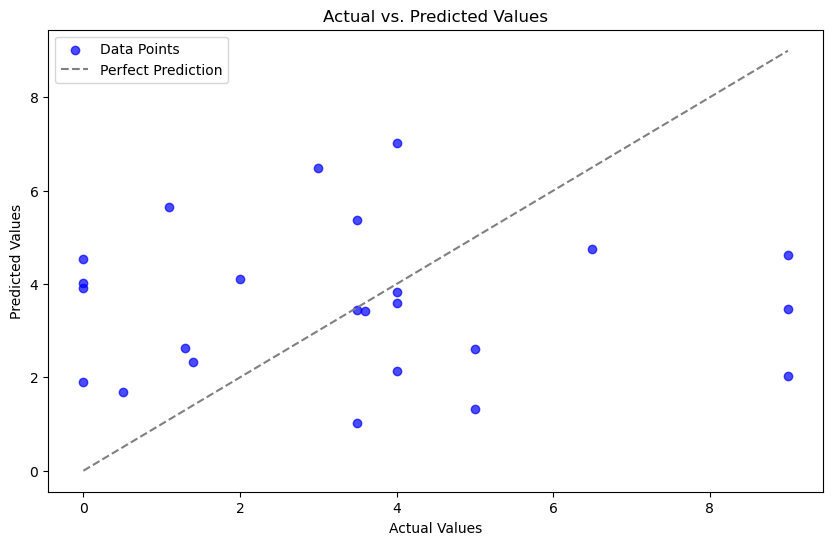

In [6]:
#Plot for showing actual vs predicted values.
import matplotlib.pyplot as plt

# Actual and Predicted values
actual = [2.0, 5.0, 4.0, 9.0, 1.4, 3.5, 0.0, 0.0, 4.0, 3.5, 9.0, 0.5, 0.0, 3.0, 3.5, 4.0, 5.0, 9.0, 0.0, 4.0, 1.3, 3.6, 6.5, 1.1]
predicted = [4.103642, 2.612027, 2.140638, 4.618990, 2.339021, 1.027209, 4.533303, 1.901423, 7.016112, 3.447904, 3.468006, 1.692030, 4.013749, 6.492734, 5.363979, 3.826295, 1.325075, 2.021905, 3.924568, 3.586047, 2.637533, 3.418178, 4.741144, 5.654763]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(actual, predicted, color='blue', alpha=0.7, label='Data Points')
plt.title("Actual vs. Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

# Add a diagonal line for reference (perfect prediction)
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], linestyle='--', color='gray', label='Perfect Prediction')

# Add a legend
plt.legend()

plt.show()
